In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

### 임의 Data 생성 함수
- numPoints : 데이터의 개수
- bias : 기본 절편 값

In [2]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape = (numPoints, 3))
    y = np.zeros(shape = numPoints)

    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0,1) * variance + i
        x[i][1] = random.uniform(0,1) * variance + i
        x[i][2] = 1

        # our target variable
        y[i] = (i + bias) + random.uniform(0,1) * variance + 500
    return x, y

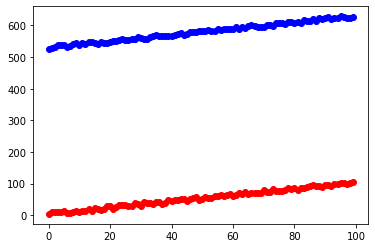

In [4]:
x, y = gen_data(100, 25, 10)

plt.plot(x[:,0:1], 'ro')
plt.plot(y, 'bo')

plt.show()

### cost 구하기

In [5]:
def compute_cost(x, y, theta):
    '''
    Comput cost for linear regression
    '''

    # Number of training samples
    m = y.size
    # y_predict = xw
    predictions = x.dot(theta)
    sqErrors = (predictions - y)

    J = ( 1.0/ (2 * m) ) * sqErrors.T.dot(sqErrors)
    return J

In [6]:
def minimize_gradient(x, y, theta, iterations = 100000, alpha = 0.01):
    m = y.size
    cost_history = []
    theta_history = []

    for _ in range(iterations):
        # xw, 100 by1
        predictions = x.dot(theta)

        # 0~n ; number of features 만큼 발생
        for n in range(theta.size):
            partial_marginal = x[:, n]
            # (100 by 1 - 100 by 1) * (100 by 1) => 100 by 1
            errors_xn = (predictions - y) * partial_marginal
            # theta update 
            theta[n] = theta[n] - alpha * (1.0 / m) * errors_xn.sum()

        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))
    
    return theta, np.array(cost_history), np.array(theta_history)

In [9]:
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(x, y, theta_initial, 1000000, 0.0001)
print('theta', theta)

theta [3.58442813e-01 6.25744446e-01 5.26157720e+02]


### sklearn과 비교

In [10]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x[:,:2], y)

# The coefficients
print('Coefficients: ', regr.coef_) 
print('intercept: ', regr.intercept_)

Coefficients:  [0.35844281 0.62574445]
intercept:  526.1577198545316


### predict

In [17]:
x[1]

array([10.812234  ,  5.98383568,  1.        ])

In [11]:
print(np.dot(theta, x[10]))
print(regr.predict(x[10,:2].reshape(1,2)))

537.299539021557
[537.29953915]
